# HW-1 - CEWA 568
### Daniel Hogan

### Problem 1  
A. Imagine you have a 1 cubic centimeter block of ice at -10 degrees C and 1 atm of pressure. Calculate the amount of energy required to melt all of the ice. (Note that you will have to warm it to 0 degrees C before you begin melting it.)

First, we calculate the energy required to raise the temperature, which is a change in thermal energy of the system (in this case our ice cube). This takes the form $\Delta E = mc \delta T$. Additionally, the bond energy that must be overcome to change the phase of matter and move from a lower energy state (solid) to a higher energy state (liquid) must be taken into account to melt the ice cube. In total, it takes around 0.32 kJ to raise the temperature to 0 and melt this ice.

In [148]:
from metpy.units import units
c_p_ice = 2.1 * units('kJ/(kelvin kg)')#kJ K-1 kg-1
deltaT = 10 * units('kelvin')# K
L_f = 334 * units('kJ/(kg)') # kJ/kg
# latent heat of vaporization for the water-vapor transition (evaporation) from at 0 C (taken from https://www.engineeringtoolbox.com/water-properties-d_1573.html)
L_v = 2500.9 * units('kJ/(kg)') #kJ/kg
# latent heat of vaporization for the ice-vapor transition (sublimation)
L_s = L_f + L_v #kJ/kg

volume = 1 * units('cm^3')# cm3
density = .918 * units('g/cm^3')# g/cm3

# Energy associated with raising temperature to 0
e_to_0 = c_p_ice*deltaT * volume * density / (1000*units('g/kg')) # m c deltaT
e_to_melt = e_to_0 + (L_f * volume * density / (1000*units('g/kg'))) #+ W(evironment_on_icecube)  n#
e_to_melt

0.32589 <Unit('kilojoule')>

B. Now, consider that same block of ice at -10 degrees C and 1 atm of pressure. Calculate the amount of energy required to sublimate all of the ice. (Note that you do not need to warm the ice to sublimate it.)

It takes substantially more energy to sublimate this block of ice (around 2.60 kJ)

In [145]:
volume = 1 * units('cm^3')# cm3
# using the density of ice at -10C from  https://www.engineeringtoolbox.com/ice-thermal-properties-d_576.html
density = .9189 * units('g/cm^3')# g/cm3
# Energy associated with raising temperature to 0

e_to_sublimate =  (L_s * volume * density / (1000*units('g/kg')))
e_to_sublimate 

2.60498961 <Unit('kilojoule')>

C. Repeat the calculations above, but imagine you are high in the mountains at 0.5 atm of pressure. What changes?

At a lower atmospheric pressure, the saturation vapor pressure of water is lower, so the boiling point will decrease and the amount of energy needed to raise the temperature of water to the boiling point is less, so if we were trying to bring water to a boil higher in the atmosphere, it would take less energy than if we were at 1 atmosphere of pressure. The temperature at which water boils at half an atmosphere was calculated using the Claussius-Clapeyron equation below and equates to 354 K or 81 C.

The vapor pressure of water decreasing at lower pressure does not impact how much energy is needed to sublimate, raise the temperature of the ice, or melt it. Since sublimation depends on the latent heat of sublimation and the latent heat of sublimation can be thought of as the energy needed to break the molecular bonds and free a molecule of ice into water vapor, this value will not change with pressure, and the energy needed for these transistions should be the same.

As a thought experiement, if we were in a closed system then increasing the pressure would lower the latent heat of vaporization until we reached the critical point because increasing the pressure would also imply increasing the temperature since they are related (think ideal gas). This increase in temperature and pressure will have a large impact on the compressible gas molecules, but a small impact on the (semi-)-incompressible liquid molecules. The latent heat in this case can be thought of as how far away is the liquid from becoming a gas. At these high temperatures and pressures, the answer is not very far. At lower temepratures and pressures, this line increases and can explain why the latent heat of vaporization at 0C is 2500 kJ/kg and at 100C it is 2269 kJ/kg

Synthesizing all this information, I would say that the energy needed for these processes should be about the same. 



In [151]:
# Using Clausius-Clapeyron we know
p_boiling_1atm = 1 * units('atm')
T_boiling_1atm = 373 * units('kelvin')
pressure = 0.5 * units('atm')
R = 0.461 * units('kJ K-1 kg-1')

h_vap = 2256 * units('kJ/(kg)') #kJ/kg
T = 1/(-(np.log(pressure/p_boiling_1atm)* R/h_vap - (1/T_boiling_1atm)))
T

354.2825826185353 <Unit('kelvin')>

In [90]:
c_p_ice = 2.1 * units('kJ/(kelvin kg)')#kJ K-1 kg-1
deltaT = 10 * units('kelvin')# K
L_f = 334 * units('kJ/(kg)') # kJ/kg
# latent heat of vaporization for the water-vapor transition (evaporation)
L_v = 2.256 * units('kJ/(kg)') #kJ/kg
# latent heat of vaporization for the ice-vapor transition (sublimation)
L_s = L_f + L_v #kJ/kg

volume = 1 * units('cm^3')# cm3
density = .918 * units('g/cm^3')# g/cm3

# Energy associated with raising temperature to 0
e_to_0 = c_p_ice*deltaT * volume * density / (1000*units('g/kg')) # m c deltaT
e_to_melt = 0.5*e_to_0 + (L_f * volume * density / (1000*units('g/kg'))) # m c deltaT + internal energy 
e_to_melt

0.316251 <Unit('kilojoule')>

D. We know that cold snow is primarily a mixture of ice and air. Consider no phase changes and temperatures between -15 degrees and -5 degrees C. Imagine that no interactions occur between the ice and air in the snow matrix. How does the energy required to heat the mixture those 10 degrees change as the fractions of ice vs. air change in the total mixture?

As the plot below shows, the behavior is linear and weighted heavily by the fact that the density of ice is around 1000 times greater than the density of air, so a lot more energy is needed as the fraction of ice increases, while only a little amount of energy is needed to change the temperature of the air. 

Text(0.5, 0, '% Ice')

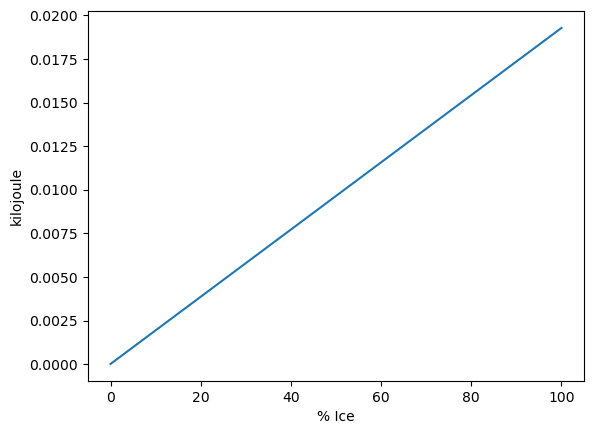

In [80]:
# Energy to increase
import numpy as np
import matplotlib.pyplot as plt
ice_air_fraction = np.linspace(0,1,100)
c_p_air = 1.0* units('kJ/(K kg)')
c_p_ice = 2.1* units('kJ/(K kg)')
deltaT = 10 * units('K')
density_air = (1.35 / 1000) * units('g/cm^3')
e_ice = c_p_ice*deltaT * ice_air_fraction * units('cm^3') * density / (1000*units('g/kg')) # 
e_air = c_p_air*deltaT * ice_air_fraction[::-1] * units('cm^3') * density_air/ (1000*units('g/kg')) # 

total_energy = e_ice +e_air
plt.plot(ice_air_fraction*100,total_energy)
plt.xlabel('% Ice')

E. I argue that sublimation saves the snowpack more than it reduces it. Why would I say this? Do you agree or disagree? Use the specific and latent heats in lab 1-2 to make your argument.

If we define "saving the snowpack" as not melting the snowpack, I would agree with this argument. The high latent heat of sublimation of ice means that the energy required to sublimate a volume of ice will remove a significant amount of energy from the snowpack. This energy loss will be expressed in the form of heat loss that works to cool the snowpack. This cooling action will therefore increase the amount of total energy required to warm the snowpack towards freezing through the relationship with the specific heat of ice as the $\Delta T$ required to reach freezing is increased.